In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ternary
from tqdm import tqdm

In [3]:
import Lizards_model as liz

In [4]:
lizard_data = np.array([
    [0.113, 0.327, 0.561],
    [0.138, 0.118, 0.745],
    [0.294, 0.367, 0.339],
    [0.240, 0.428, 0.332],
    [0.127, 0.483, 0.390],
    [0.089, 0.355, 0.556],
    [0.136, 0.407, 0.457],
    [0.257, 0.604, 0.139],
    [0.091, 0.535, 0.375],
    [0.079, 0.442, 0.478]
])

In [9]:
param_grid = np.zeros((10,10,10))

for i in tqdm(range(10)):
    for j in range(10):
        for k in range(10):
            mean_mse = []
            for _ in range(100):
                space, y = liz.exec_sim(
                    r = 0.6,
                    p1 = 0.1*(i+1),
                    p2 = 0.1*(j+1),
                    p3 = 0.1*(k+1),
                    mu = 0.01,
                    S = 30,
                    years = 9,
                    x0 = 50,
                    proportion = (0.113,0.327,0.561)
                )

                mse = np.sum((y - lizard_data[1:])**2 / 9)

                mean_mse.append(mse)

            param_grid[i,j,k] = np.mean(mean_mse)

100%|██████████| 10/10 [3:22:38<00:00, 1215.87s/it] 


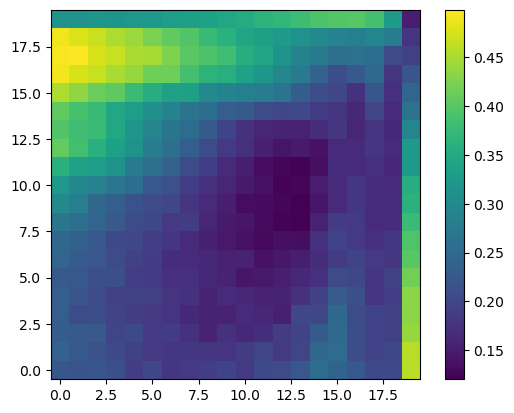

In [8]:
plt.imshow(param_grid, origin = 'lower')
plt.colorbar()
plt.show()

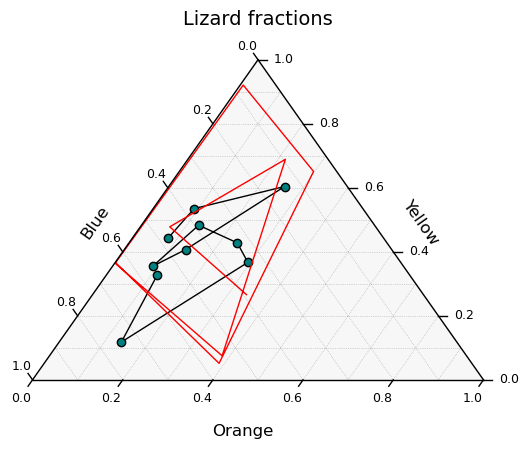

In [19]:
fig, tax = ternary.figure()

tax.plot(y, color='red', lw = 1)
tax.plot(lizard_data, color='black', lw = 1, zorder = 0)
tax.scatter(lizard_data, color='teal', lw = 1, edgecolor = 'black')
tax.boundary(linewidth=1.0)
tax.gridlines(color="black", multiple=0.1, alpha = 0.3)

tax.set_title("Lizard fractions", fontsize=14, pad = 16)
tax.left_axis_label("Blue", fontsize=12, offset = 0.12)
tax.right_axis_label("Yellow", fontsize=12, offset = 0.12)
tax.bottom_axis_label("Orange", fontsize=12, offset = 0.12)

tax.ticks(axis='lbr', multiple=0.2, linewidth=1, tick_formats="%.1f", offset=0.02,
         fontsize = 9)
# tax.lim(0, 1)
tax.get_axes().axis('off')

# plt.savefig('Lizard_fractions.png', dpi = 100, bbox_inches = 'tight')
plt.show()